Analysis
1. Temperature is maximum near equatorial regions (+- of 20 degrees).
2. There is no correlation nor observable trends for cloudiness and wind speed.
3. Cities located approximately above 60 degree latitude are more likely to be humid than of the cities below 60 degree latitude.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import time
import seaborn as sns
import csv
import urllib
from citipy import citipy
from configweather import weather_key

In [2]:
data_file = 'cities.csv'

In [3]:
lat = (-90, 90)
lng = (-180, 180)

In [4]:
lats_lngs = []
cities = []

In [5]:
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lats_lngs = zip(lats,lngs)

In [6]:
for lat_lng in lats_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

len(cities)

619

In [7]:
cities

['hithadhoo',
 'mataura',
 'carnarvon',
 'ribeira grande',
 'hasaki',
 'bethel',
 'nelson bay',
 'ushuaia',
 'touros',
 'ulverstone',
 'ponta do sol',
 'hobyo',
 'punta arenas',
 'mareeba',
 'ilulissat',
 'camacha',
 'yulara',
 'mayo',
 'hilo',
 'albany',
 'olafsvik',
 'luderitz',
 'castro',
 'hamada',
 'nikolskoye',
 'dikson',
 'saint george',
 'roma',
 'ust-tsilma',
 'beringovskiy',
 'bluff',
 'mar del plata',
 'upernavik',
 'rikitea',
 'kapaa',
 'wewak',
 'lebu',
 'chokurdakh',
 'esperance',
 'stillwater',
 'busselton',
 'belushya guba',
 'altamont',
 'georgetown',
 'new norfolk',
 'havoysund',
 'larvik',
 'batagay',
 'aden',
 'russell',
 'lakatoro',
 'san pedro carcha',
 'atar',
 'dalton',
 'mmathubudukwane',
 'north bend',
 'vaitupu',
 'sorkjosen',
 'hermanus',
 'east london',
 'jamestown',
 'namibe',
 'taolanaro',
 'tuktoyaktuk',
 'makakilo city',
 'harwich',
 'san andres',
 'sala',
 'mahebourg',
 'nguru',
 'abu samrah',
 'bonavista',
 'rybnaya sloboda',
 'nizhneyansk',
 'high le

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_key

In [9]:
city_data = []

In [10]:
record_count = 1
set_count = 1

In [11]:
for i, city in enumerate(cities):
    
    if(i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    city_url = url + "&q=" + urllib.request.pathname2url(city)
    
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)
    
    record_count += 1
    
    try:
        city_weather = requests.get(city_url).json()
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    
    except:
        print("City not found")
        pass

Processing Record 1 of Set 1 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=hithadhoo
Processing Record 2 of Set 1 | mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=mataura
Processing Record 3 of Set 1 | carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=carnarvon
Processing Record 4 of Set 1 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=ribeira%20grande
Processing Record 5 of Set 1 | hasaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=hasaki
Processing Record 6 of Set 1 | bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=bethel
Processing Record 7 of Set 1 | nelson bay
http://api.openweathermap.org/data/2.5

Processing Record 4 of Set 2 | mmathubudukwane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=mmathubudukwane
Processing Record 5 of Set 2 | north bend
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=north%20bend
Processing Record 6 of Set 2 | vaitupu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=vaitupu
City not found
Processing Record 7 of Set 2 | sorkjosen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=sorkjosen
City not found
Processing Record 8 of Set 2 | hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=hermanus
Processing Record 9 of Set 2 | east london
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=east%20london
Processing Record 10 of Set 2 

Processing Record 8 of Set 3 | cape town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=cape%20town
Processing Record 9 of Set 3 | kathu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=kathu
Processing Record 10 of Set 3 | kawana waters
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=kawana%20waters
City not found
Processing Record 11 of Set 3 | barrow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=barrow
Processing Record 12 of Set 3 | eyl
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=eyl
Processing Record 13 of Set 3 | cienfuegos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=cienfuegos
Processing Record 14 of Set 3 | rio grande
http://api.openweathermap.

Processing Record 11 of Set 4 | tutayev
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=tutayev
Processing Record 12 of Set 4 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=saint-philippe
Processing Record 13 of Set 4 | killybegs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=killybegs
Processing Record 14 of Set 4 | salgueiro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=salgueiro
Processing Record 15 of Set 4 | aranjuez
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=aranjuez
Processing Record 16 of Set 4 | tuatapere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=tuatapere
Processing Record 17 of Set 4 | elizabeth city
http://api.openweat

Processing Record 14 of Set 5 | leh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=leh
Processing Record 15 of Set 5 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=bambous%20virieux
Processing Record 16 of Set 5 | alofi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=alofi
Processing Record 17 of Set 5 | lindas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=lindas
Processing Record 18 of Set 5 | namatanai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=namatanai
Processing Record 19 of Set 5 | karaul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=karaul
City not found
Processing Record 20 of Set 5 | victoria
http://api.openweathermap.org/da

Processing Record 18 of Set 6 | vanavara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=vanavara
Processing Record 19 of Set 6 | lorengau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=lorengau
Processing Record 20 of Set 6 | maarianhamina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=maarianhamina
City not found
Processing Record 21 of Set 6 | ust-nera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=ust-nera
Processing Record 22 of Set 6 | gizo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=gizo
Processing Record 23 of Set 6 | muscat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=muscat
Processing Record 24 of Set 6 | massaguet
http://api.openweathermap.o

Processing Record 21 of Set 7 | khartoum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=khartoum
Processing Record 22 of Set 7 | sur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=sur
Processing Record 23 of Set 7 | waingapu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=waingapu
Processing Record 24 of Set 7 | barawe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=barawe
City not found
Processing Record 25 of Set 7 | port hedland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=port%20hedland
Processing Record 26 of Set 7 | port-gentil
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=port-gentil
Processing Record 27 of Set 7 | grindavik
http://api.openweatherm

Processing Record 26 of Set 8 | svetlyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=svetlyy
City not found
Processing Record 27 of Set 8 | manoel urbano
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=manoel%20urbano
Processing Record 28 of Set 8 | kavieng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=kavieng
Processing Record 29 of Set 8 | fianga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=fianga
City not found
Processing Record 30 of Set 8 | chaoyang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=chaoyang
Processing Record 31 of Set 8 | kulotino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=kulotino
Processing Record 32 of Set 8 | mayumba
http://a

Processing Record 31 of Set 9 | reshetylivka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=reshetylivka
Processing Record 32 of Set 9 | vaasa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=vaasa
Processing Record 33 of Set 9 | tyrma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=tyrma
Processing Record 34 of Set 9 | west bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=west%20bay
Processing Record 35 of Set 9 | bonnyville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=bonnyville
Processing Record 36 of Set 9 | yola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=yola
Processing Record 37 of Set 9 | taoudenni
http://api.openweathermap.org/data/2.5/weather

Processing Record 34 of Set 10 | ishigaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=ishigaki
Processing Record 35 of Set 10 | vila franca do campo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=vila%20franca%20do%20campo
Processing Record 36 of Set 10 | ibra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=ibra
Processing Record 37 of Set 10 | yurga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=yurga
Processing Record 38 of Set 10 | pelym
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=pelym
Processing Record 39 of Set 10 | acarau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=acarau
City not found
Processing Record 40 of Set 10 | qui nhon
http://api.op

Processing Record 38 of Set 11 | laguna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=laguna
Processing Record 39 of Set 11 | bad sooden-allendorf
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=bad%20sooden-allendorf
Processing Record 40 of Set 11 | cherskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=cherskiy
Processing Record 41 of Set 11 | sabang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=sabang
Processing Record 42 of Set 11 | ayame
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=ayame
Processing Record 43 of Set 11 | beira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=beira
Processing Record 44 of Set 11 | nalut
http://api.openweathermap.org/d

Processing Record 42 of Set 12 | puerto escondido
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=puerto%20escondido
Processing Record 43 of Set 12 | kungurtug
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=kungurtug
Processing Record 44 of Set 12 | tilichiki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=tilichiki
Processing Record 45 of Set 12 | maroua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=maroua
Processing Record 46 of Set 12 | dezful
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=dezful
Processing Record 47 of Set 12 | saint-georges
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73e08d776cddb6fea3326d477ffafc5b&q=saint-georges
Processing Record 48 of Set 12 | verkhoyansk
http://

In [12]:
city_data_pd = pd.DataFrame(city_data)

In [13]:
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

In [14]:
city_data_pd.to_csv('cities_data.csv', index_label = 'city_id')

In [15]:
city_data_pd.count()

City          561
Cloudiness    561
Country       561
Date          561
Humidity      561
Lat           561
Lng           561
Max Temp      561
Wind Speed    561
dtype: int64

In [16]:
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hithadhoo,48,MV,1530250417,100,-0.60,73.08,83.30,5.95
1,mataura,92,NZ,1530250417,100,-46.19,168.86,44.24,3.38
2,carnarvon,12,ZA,1530250417,79,-30.97,22.13,32.36,6.96
3,ribeira grande,56,PT,1530250417,100,38.52,-28.70,70.34,16.69
4,hasaki,20,JP,1530246600,62,35.73,140.83,89.60,19.46


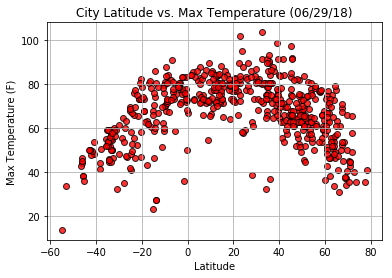

In [17]:
plt.scatter(lats,
            max_temps,
            color="red",
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig('lat_vs_temp.png')
plt.show()

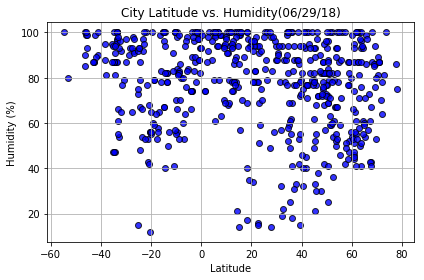

In [18]:
plt.scatter(lats,
            humidity,
            color="blue",
            edgecolor="black", 
            linewidths=1, 
            marker="o", 
            alpha = 0.8,
            label="Cities")

plt.title("City Latitude vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.tight_layout()
plt.savefig('lat_vs_humidity.png')
plt.show()

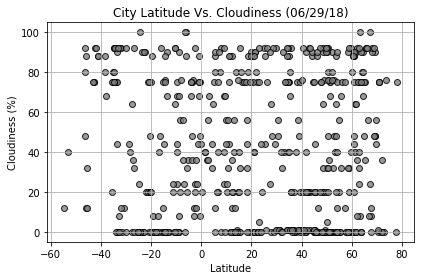

In [19]:
plt.scatter(lats,
            cloudiness,
            color="grey", 
            edgecolor="black", 
            linewidths=1, 
            marker="o", 
            alpha = 0.8,
            label="Cities")

plt.title("City Latitude Vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.tight_layout()
plt.savefig('lat_vs_cloudiness.png')
plt.show()

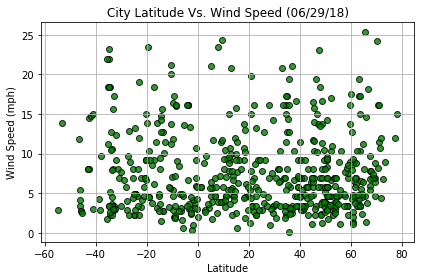

In [20]:
plt.scatter(lats,
            wind_speed,
            color="green",
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

plt.title("City Latitude Vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.tight_layout()
plt.savefig('lat_vs_windspeed.png')
plt.show()